# Image Classification with CNNs



## Introduction

In this assignment, we are going to build, train and validate **convolutional neural networks** (ConvNets).
For this purpose, we will use data from the publicly available CIFAR10 dataset.
CIFAR10 is a dataset commonly used in the community of computer vision and machine learning to benchmark new algorithms and network architectures.

CIFAR10 is a dataset that contains (small) RGB images of 32x32 px of ten different classes:

    * airplane
    * automobile
    * bird
    * cat
    * deer
    * dog
    * frog
    * horse
    * ship
    * truck
More details can be found at this link: https://www.cs.toronto.edu/~kriz/cifar.html

Based on an overview found on this website: https://paperswithcode.com/sota/image-classification-on-cifar-10, the current state-of-the-art result on this dataset has reached an accuracy of 99.7%.

In this assignment, you will probably reach an accuracy between 60% and 70%, which is perfectly fine!

## Data
We will train our ConvNet with images from CIFAR10, a dataset of 60,000 colour images of 32x32 pixels in 10 classes. The downloaded training samples come split into 5 batches of 10,000 samples each, which is useful to do cross-validation for example. In this assignment, you will have to decide how to best split the dataset into training and validation sets. A separate test set is provided in CIFAR10, which is the same set used by other researchers to benchmark their methods.

## Tasks
We define 10 tasks in this assignment.
Although 10 tasks sound like a lot of work, you will see that they are highly repetitive (meaning, you will do a lot of copy-paste across cells in the notebook),
Like we mentioned in the lecture this week, given the experience you have gained by defining datasets and training neural networks, training convolutional neural networks is just a natural step towards using a different architectures (and some additional tricks and tools).

---

The task that we propose are the following:

### Task 1. Split data and build convolutional networks
In this task, you will first define your training and validation set, then you will build the architecture of convolutional networks.

### Task 2. Train convolutional networks
In this task, you will train your first model using CIFAR10, apply the trained model to the test set. In order to define training functions and parameteres, you can reuse a lot of code developed last week.

### Task 3. Add dropout layer(s)
In this task, you will modify the architecture of your network by adding dropout, which is implemented in Keras in the form of a layer. After that, you will repeat the training procedure and compare the results with the ones of the *plain* network.

### Task 4. Add batch normalization
In this task, you will do something similar to task 3, but now adding batch normalization.
You will repeat the experiment and compare the performance with previous architectures.

### Task 5. Try different initialization strategies
We have seen that at least a couple of initilization strategies are known in the literature for (convolutional) neural networks.
Several strategies are implemented in the Keras library.
Try some of them and report the results.

### Task 6. Try different nonlinearities
The same for nonlinearities, we have seen that ```ReLU``` is some kind of default choice for ConvNets, but other strategies exists. Do experiments, report the results and compare with previous approaches.

### Task 7. Add L2 regularization
Modify the loss function to use L2 regularization.
Again, run experiments and report results.

### Task 8. Add data augmentation
Think of possible ways you can augment the (training) data.
You can build a new (bigger) training set, or implement some kind of data augmentation *on-the-fly*, where some patches in the mini-batch are randomly selected and augmented with a (random) operation. Think of transformations that make sense in the context of classification of natural images.

### Task 9. Try a different architecture
You can try to improve the performance by modifying the architecture, using more layers, or wider layers (same number of layers but more filters, which means more parameters). Use all the tools you have investigated so far, the optimal combination of the options you have tried in previous tasks. The goal is to get high accuracy on the validation (and therefore on the test) set!

### Task 10. Monitor the training procedure
Finally, implement some tools to monitor the training procedure.
Examples are the analysis of statistics of activations, or visualizing the filters learned.
If done during training, visualizing filter will also nicely show how the network refines random parameters to come up with meaningful filters (especially in the first layer).

---


In this notebook we provide some parts of code implemented.
Some other parts are not implemented, but we define the variables that will be used in functions, to help you in the development of the assignment.

## Let's get started

In [1]:
# import libraries
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, initializers, optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

## Get to know your data: Load data and define datasets

CIFAR10 contains 5 batches that can be used for training/validation, and one batch that consists of the test set.
In order to train your network, you will have to define a training set and a validation set. Do not use the test set as training data, and do not use any knowledge on the labels of the test set (being a publicly available dataset, we cannot avoid exposing the labels of the test set).


Think of the best way to split data into training and validation set. Note that the format that layers in convolutional networks like (at least in the Keras/Tensorflow libraries that we are using), is as follows:

    (n_samples, rows, cols, n_channels)

This means that each training (but also validation and test) sample needs to have four dimensions. This kind of structure (multi-dimensional array), is called a **tensor**. In practice, this format is also convenient because the first index of the tensor refers to the sample itself, so we can use:

    tensor[i]
    
to extract the i-th example.

During training, several samples will be used to update the parameters of a network. In the case of CIFAR10, if we use M samples per mini-batch, the shape of the mini-batch data is:

    (M, 32, 32, 3)

Make sure data is organized in this way, for the training, validation and test datasets.

### Download CIFAR10 data
The following cell will download the 5 batches of the CIFAR10 training dataset as well as the test set to your disk and load it in memory.

In [2]:
from keras.datasets import cifar10

# Load CIFAR10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Define data size and number of classes
data_size_in = (32, 32, 3)
n_classes = 10

# Load labels CIFAR10 (for reference, not used in training directly)
label_to_names = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat',
                  4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

print ("-----------------------------------------------------")
print (label_to_names)
print ("-----------------------------------------------------")
print ("> shape training set tensor: {}".format(x_train.shape))
print ("> length training labels: {}".format(len(y_train)))
print ("-----------------------------------------------------")
print ("> shape test set tensor: {}".format(x_test.shape))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
-----------------------------------------------------
{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}
-----------------------------------------------------
> shape training set tensor: (50000, 32, 32, 3)
> length training labels: 50000
-----------------------------------------------------
> shape test set tensor: (10000, 32, 32, 3)


# Build a convolutional network

In this task you create the definition of your convolutional network. If you want you can check out the **functional API** of Keras; this API enables you to make more advanced models and is more flexible to use. A guide can be found here: https://www.tensorflow.org/api_docs/python/tf/keras

Example of sequential API:
```python
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(32, input_dim=784), activation='relu')
model.add(layers.Dense(32, activation='relu')
model.add(layers.Dense(10, activation='softmax'))

model.compile(...)
```

Example of same model using the functional API (**recommended**):

```python
from keras import models, layers

inputs = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(inputs)
x = layers.Dense(32, activation='relu')(x)
predictions = layers.Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)
model.compile(...)
```

The functional API can look a bit more complex at start in comparision to the sequential API. However, it gives you access to each individual layer and lets you more easily build up your network. The only difference between the two APIs is the way you build up your network, all other parts (training, applying a network, etc.) are the same.

 **Network**  
Define your network builder function.
We build a convolutional network that contains:

1. input layer
2. convolutional layer
3. max pooling layer
4. convolutional layer
5. max pooling layer
6. fully-connected layer(s)
7. soft-max layer

 **Hint**

1. Select the number of convolutional and max pooling layers and choose the filter size so that the input image is shrinked to 5x5 before the fully connected layers.
2. Use at least one fully connected layer between the last convolutional layer and the output layer (which is the fully connected layer with softmax nonlinearity).
3. You can reuse the code you used last week to build a fully-connected network, just remember that this time you have to use convolutional layers!

In [3]:
# Data Augmentation Pipeline
# Applied only during training to improve generalization.
# Sequentially applies common image transformations.
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1, 0.1),
], name="data_augmentation")

In [4]:
# Initializers & Regularizers
ki = initializers.HeUniform()
kr_dense = regularizers.l2(1e-5)

In [5]:
# CNN Model for CIFAR-10 Classification
model = models.Sequential([
    tf.keras.Input(shape=(32,32,3)),  # CIFAR-10 image size with RGB channels

    # --- Data Augmentation inserted early ---
    data_augmentation,

    # ------- Convolution Block 1 -------
    layers.Conv2D(64, (3,3), activation='relu', padding='same',
                  kernel_initializer=ki),
    layers.BatchNormalization(),  # Normalize activations → faster convergence, stability
    layers.Conv2D(64, (3,3), activation='relu', padding='same',
                  kernel_initializer=ki),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),   # Downsample → spatial feature hierarchy
    layers.Dropout(0.25),         # Reduce overfit risk at early layers


    # ------- Convolution Block 2 -------
    layers.Conv2D(128, (3,3), activation='relu', padding='same',
                  kernel_initializer=ki),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu', padding='same',
                  kernel_initializer=ki),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),


    # ------- Convolution Block 3 -------
    layers.Conv2D(256, (3,3), activation='relu', padding='same',
                  kernel_initializer=ki),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3,3), activation='relu', padding='same',
                  kernel_initializer=ki),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # ------- Classifier Head (Fully Connected Blocks) -------
    layers.Flatten(),     # Flatten feature maps → feed into Dense network

    # ------- Dense Block 1 -------
    layers.Dense(256,
                 activation='relu',
                 kernel_initializer=ki,
                 kernel_regularizer=kr_dense),
    layers.BatchNormalization(),
    layers.Dropout(0.25),  # Stronger regularization near final layers

    # ------- Dense Block 2 -------
    layers.Dense(128,
                 activation='relu',
                 kernel_initializer=ki,
                 kernel_regularizer=kr_dense),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    # ------- Output Classification Layer -------
    layers.Dense(
        10,                                      # 10 neurons → one per CIFAR‑10 class
        activation='softmax',                    # Softmax → converts logits into normalized class probabilities
        kernel_initializer=initializers.GlorotUniform())  # Glorot/Xavier init keeps input/output variance balanced
])

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,02

 Total params: 2,233,546 (8.52 MB)

 Trainable params: 2,230,986 (8.51 MB)

 Non-trainable params: 2,560 (10.00 KB)

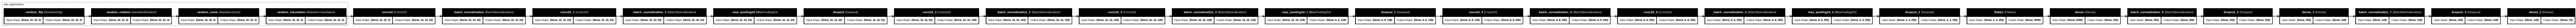

In [7]:
from tensorflow.keras.utils import plot_model

# Save architecture diagram to a PNG file
plot_model(model,
           to_file='model_architecture.png',
           show_shapes=True,
           show_layer_names=True,
           expand_nested=True,   # expands nested layers like Sequential
           dpi=96,               # resolution of the image
           rankdir='LR')


## Loss function & Optimization Algorithm

Now that the architecture is defined, we have to specify the two other components of our learning framework, namely the loss function and the optimization algorithm.

Once you have defined these two components, you will have to **compile** the network using the function ```model.compile()```.

The ```model.compile()``` function requires the following input parameters:
1. loss function -> the loss function
2. optimizer -> the optimization algorithm
3. metrics -> the performance parameters you want to compute

You can find information about how to use the ```compile()``` function at this page: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

### Loss
We have to define a function that, given the network, gets the predicted probability for a given input sample.
Since we are dealing with a multi-class classification problem, **categorical cross-entropy** seems a reasonable choice.

### Optimization algorithm
To train our model, we use the Adam optimizer — an adaptive gradient-based optimization algorithm that combines the benefits of momentum and RMSProp. Unlike plain Stochastic Gradient Descent (SGD), Adam automatically adjusts the learning rate for each parameter based on the first and second moments of the gradients, resulting in faster and more stable convergence.

In addition, we apply an Exponential Learning Rate Decay schedule. This gradually decreases the learning rate during training.

This allows large steps early in training (speeding up convergence) and smaller steps later (for fine‑tuning and stability). In our model, we start with an initial learning rate of 1e‑3, decaying it smoothly by 0.9 every 10 000 steps. This combination helps the model generalize better and prevents overshooting.

### Metrics
Since we are developing a classifier for a multi-class problem, the accuracy seems like a reasonable choice.

In the end, you need to compile your network with your settings.

In [8]:
# Learning Rate Schedule
initial_lr = 1e-3  # Base learning rate for training (common starting point for Adam)

# Exponential learning rate decay:
# - decays LR smoothly over time: lr_t = initial_lr * (decay_rate)^(step/decay_steps)
# - decay_steps controls how quickly the exponent progresses
# - decay_rate < 1 means the LR shrinks (here 0.9 → gentle decay)
# - staircase=False → continuous decay; set True for step-wise drops

lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=10000,  # Number of optimizer steps per "decay period"
    decay_rate=0.9,     # Multiply LR by 0.9 each period (smooth decay)
    staircase=False     # Continuous decay (not step-wise)
)

In [9]:
# Adam optimizer:
# - beta_1: momentum for first moment (default 0.9, stable)
# - beta_2: momentum for second moment (default 0.999, stable)
# - learning_rate uses the above schedule
opt = optimizers.Adam(
    learning_rate=lr_schedule,
    beta_1=0.9,
    beta_2=0.999
)

In [10]:
# Model Compilation
# - loss: categorical_crossentropy → use when labels are one-hot encoded (10 classes)
# - metrics: accuracy → overall classification accuracy
model.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### One-hot encoding

If we are using categorical cross-entropy as loss function, we need a representation of labels in the training (and later validation) data in a 'one-hot' form. This means that if we have 5 classes, the format of labels has to be the following:

* ```y_train = 1 -> [1, 0, 0, 0, 0]```
* ```y_train = 2 -> [0, 1, 0, 0, 0]```
* ```y_train = 3 -> [0, 0, 1, 0, 0]```
* ```y_train = 4 -> [0, 0, 0, 1, 0]```
* ```y_train = 5 -> [0, 0, 0, 0, 1]```

Lucky for you, Keras has implemented such a [function](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical). We can use that to convert the given format into a 'one-hot' format. First, check the format of labels in your dataset, then check if the function of Keras does what it is supposed to do.

In [11]:
# Convert integer class labels (0–9) to one-hot vectors of length 10
# Required for 'categorical_crossentropy' loss (vs. use sparse_categorical_crossentropy for integers)
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# This should print: (50000, 10)
print('y_train_one_hot.shape: ', y_train.shape)
# This should print: (10000, 10)
print('y_test_one_hot.shape: ', y_test.shape)


y_train_one_hot.shape:  (50000, 10)
y_test_one_hot.shape:  (10000, 10)


### Check validation performance before training
All the main components required to train our network have been defined now.
However, we have seen that in order to properly monitor the behaviour of a network during training, we should check the performance (the accuracy) on a separate validation set, and see if it returns something sensible.
For this purpose, you can use the function ```model.evaluate``` in Keras, and set the ```batch_size``` to a value that fits in your GPU/CPU.

In [12]:
# validate the network
scores = model.evaluate(x_test, y_test, batch_size=None)
val_loss = scores[0]
val_acc = scores[1]
print ('Initial validation accuracy = {:.2f}%'.format(100.*val_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.0995 - loss: 3.1316
Initial validation accuracy = 10.00%


# Train your network

Now you can define a function that does trains the convnet by updating parameters for each mini-batch. This function will have to inculde the two main steps that we implemented last week:

  1. a pass over the training set, to update the parameters
  2. a pass over the validation set, to check the performance.
  
During training/validation, you will have to store the loss and accuracy values, in order to visualize them after each epoch in a plot that shows the learning curves. This is useful to monitor the training procedure.


In [13]:
# Model Training
# ==========================================
# - x_train, y_train: training dataset and one-hot encoded labels
# - epochs=150: full passes through the dataset (may adjust based on convergence)
# - batch_size=128: number of samples per gradient update (balance GPU memory & convergence speed)
# - validation_split=0.2: reserve 20% of training data for validation during training
# - shuffle=True: randomize training data order at each epoch to improve generalization
# - verbose=1: show progress bar and metrics per epoch
# 'history' stores training metrics (loss, accuracy, etc.) for later plotting/analysis
history = model.fit(
    x_train, y_train,
    epochs=150,
    batch_size=128,
    validation_split=0.2,
    shuffle=True,
    verbose=1
)

Epoch 1/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 63ms/step - accuracy: 0.3000 - loss: 2.1114 - val_accuracy: 0.3837 - val_loss: 1.8065
Epoch 2/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.4740 - loss: 1.4672 - val_accuracy: 0.5524 - val_loss: 1.3840
Epoch 3/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - accuracy: 0.5495 - loss: 1.2654 - val_accuracy: 0.5881 - val_loss: 1.2505
Epoch 4/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - accuracy: 0.5941 - loss: 1.1463 - val_accuracy: 0.6363 - val_loss: 1.0693
Epoch 5/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.6349 - loss: 1.0393 - val_accuracy: 0.6540 - val_loss: 1.0452
Epoch 6/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.6609 - loss: 0.9707 - val_accuracy: 0.6931 - val_loss: 0.9181
Epoch 7/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - accuracy: 0.6867 - loss: 0.9115 - val_accuracy: 0.6613 - val_loss: 1.0208
Epoch 8/150
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.7140 - loss: 0

 📈 Training Progress Visualization  

This cell visualizes the **learning curves** of the model across all epochs — tracking both loss and accuracy for training and validation sets.  

It extracts metric histories from the `history` object returned by `model.fit()` and plots:
- **Training Loss** (blue)  
- **Training Accuracy** (cyan)  
- **Validation Loss** (magenta)  
- **Validation Accuracy** (red)  

The plot title dynamically sho the **best validation accuracy** achieved during training.  
By monitoring these curves, we can:
- Detect **overfitting** (validation loss rising while training loss drops).  
- Evaluate **convergence** speed and stability.  
- Adjust parameters such as **learning rate**, **regularization**, or **dropout** accordingly.  

The code also uses:
- `IPython.display.clear_output()` for smooth live updates inside the notebook (one plot replaces the previous one each epoch).  
- A short `time.sleep(0.2)` delay

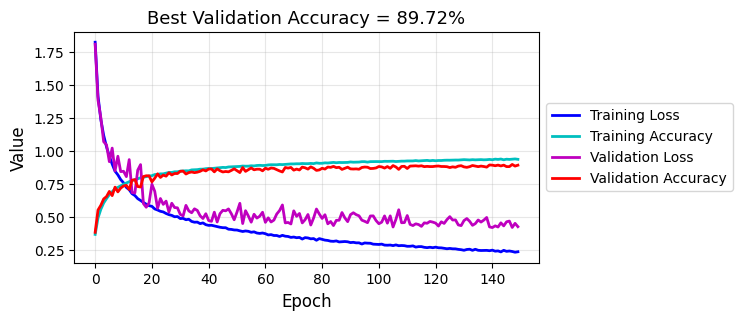

In [37]:
import matplotlib.pyplot as plt
from IPython import display
import time

hist = history.history

tra_losses = hist['loss']
val_losses = hist['val_loss']
tra_accs = hist.get('accuracy', hist.get('acc'))          # handles both keys
val_accs = hist.get('val_accuracy', hist.get('val_acc'))

best_validation_accuracy = max(val_accs)

# Visualization of learning curves
fig = plt.figure(figsize=(6, 3))

tra_loss_plt, = plt.plot(range(len(tra_losses)), tra_losses, 'b', linewidth=2)
tra_accs_plt, = plt.plot(range(len(tra_accs)), tra_accs, 'c', linewidth=2)
val_loss_plt, = plt.plot(range(len(val_losses)), val_losses, 'm', linewidth=2)
val_acc_plt, = plt.plot(range(len(val_accs)), val_accs, 'r', linewidth=2)

plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(
    [tra_loss_plt, tra_accs_plt, val_loss_plt, val_acc_plt],
    ['Training Loss', 'Training Accuracy', 'Validation Loss', 'Validation Accuracy'],
    loc='center left', bbox_to_anchor=(1.0, 0.5)
)
plt.grid(alpha=0.3)
plt.title(f'Best Validation Accuracy = {100. * best_validation_accuracy:.2f}%', fontsize=13)
plt.savefig('learning_curves.png', dpi=300, bbox_inches='tight')

display.clear_output(wait=True)
display.display(plt.gcf())

time.sleep(0.2)
plt.close(fig)

In [22]:
# Model Evaluation on Test Data
# - x_test, y_test: unseen test set (not used during training)
# - returns: [test_loss, test_accuracy]
# - Use verbose=1 for progress display
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

print(f"Test Loss: {test_loss:.4f}")
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8897 - loss: 0.4309
Test Loss: 0.4324

Test Accuracy: 0.8885


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


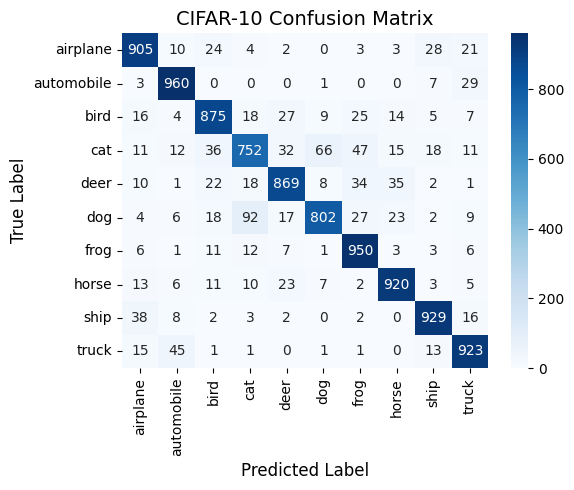


Classification Report:

              precision    recall  f1-score   support

    airplane       0.89      0.91      0.90      1000
  automobile       0.91      0.96      0.94      1000
        bird       0.88      0.88      0.88      1000
         cat       0.83      0.75      0.79      1000
        deer       0.89      0.87      0.88      1000
         dog       0.90      0.80      0.85      1000
        frog       0.87      0.95      0.91      1000
       horse       0.91      0.92      0.91      1000
        ship       0.92      0.93      0.92      1000
       truck       0.90      0.92      0.91      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [42]:
# Confusion Matrix Visualization for CIFAR-10
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 1. Generate Predictions
y_pred_probs = model.predict(x_test)            # model outputs probabilities
y_pred = np.argmax(y_pred_probs, axis=1)        # convert to predicted class indices
y_true = np.argmax(y_test, axis=1)              # convert one-hot labels to class indices

# 2. Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# 3. Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('CIFAR-10 Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()

# Save visual
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# 4. Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

In [39]:
# Results Summary
print(f"✅ Best Validation Accuracy: {max(history.history['val_accuracy']):.4f}")
print(f"✅ Final Test Accuracy: {test_acc:.4f}")


✅ Best Validation Accuracy: 0.8972
✅ Final Test Accuracy: 0.8885


# Questions

## Question 1
The learning curves changed after adding dropout. How, and why?

*Your answer here.*

Before implementing the dropout layer, the validation loss starts to increase very early, while the training loss resumes to decline. This mismatch indicates that the network has begun to overfit. At this point, it is better to do something to prevent overfitting such as dropout. At each update of the training phase, the dropout layer tries setting the outgoing edges of hidden units (neurons that make up hidden layers) to zero. Thus, after adding these layers, the overfitting problem got almost improved as it can be seen the gap between training and validation loss curves has been removed and they are changing in the same pace.

## Question 2
Calculating the sigmoid function is computationally expensive. What is the other main weakness of the function?


*Your answer here.*

For a large positive or large negative number, the sigmoid's output saturates (the curve becomes parallel to the x-axis). As a result, the gradient in these areas is nearly zero. This local gradient is multiplied by the gradient of this gate's output during backpropagation. Consequently, if the local gradient is very small, the gradient will be killed and the network will not learn. Interestingly, This vanishing gradient problem would be solved by ReLU or other functions similar to ReLU like SeLU or GeLU.

## Question 3
Is it necessary to monitor the L2 loss during training? Why?

*Your answer here.*

No, it would not need to monitor the changes of L2 loss function. As we know, regularizations are techniques for reducing error and avoiding overfitting by fitting a function appropriately on the given training set. L2 as a regularization term is a coefficient ($\lambda$) by the quadratic norm of weights that permanently tries to control the value of parameters to avoid getting large. Thus, L2 adjusts itself with the main term of the loss function. Then, these two terms should modify at the same time. Consequently, it seems individually monitoring of L2 loss could not be helpful in this case.

## Question 4
Should the upside-down flipping be used as augmentation? Why?

*Your answer here.*

No, since data augmentation should make sense for new data. In this specific dataset (CIFAR10), as all images are real-world examples and we can not see any of them in a head-to situation, we should not train our model with 180-degree-rotated pictures then evaluate our model with the regular test set.